<a href="https://colab.research.google.com/github/hghri/DataScience/blob/main/RFM_Clustring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from sklearn.cluster import KMeans

In [2]:
df=pd.read_excel("/content/Online Retail.xlsx")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [4]:
df=df.dropna()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [6]:
df['InvoiceDay']=df['InvoiceDate'].apply(lambda x: dt.datetime(x.year,x.month,x.day) )

In [7]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDay
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12-09
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12-09
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-09
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-09


In [8]:
pin_date=max(df['InvoiceDay']) + dt.timedelta(1)

In [9]:
df['total_sum']=df['Quantity'] * df['UnitPrice']

In [10]:
rfm=df.groupby(['CustomerID']).agg(
    {
        'InvoiceDay' : lambda x : (pin_date - x.max()).days,
        'InvoiceNo' : 'count',
        'total_sum' : 'sum'

    }
)
rfm

,InvoiceDay,InvoiceNo,total_sum
CustomerID,,,
12346.0,326,2,0.00
12347.0,3,182,4310.00
12348.0,76,31,1797.24
12349.0,19,73,1757.55
12350.0,311,17,334.40
...,...,...,...
18280.0,278,10,180.60
18281.0,181,7,80.82
18282.0,8,13,176.60


In [11]:
rfm=rfm.rename(columns={
    'InvoiceDay' : 'Recency',
    'InvoiceNo' : 'Frequency',
    'total_sum':'Monetary'

})

In [12]:
r_labels=[4,3,2,1]
r_groups=pd.qcut(rfm['Recency'],labels=r_labels,q=4)
f_labels=range(1,5)
f_groups=pd.qcut(rfm['Frequency'],labels=f_labels,q=4)
m_labels=range(1,5)
m_groups=pd.qcut(rfm['Monetary'],labels=m_labels,q=4)


In [13]:
rfm['R']=r_groups.values
rfm['F']=f_groups.values
rfm['M']=m_groups.values


In [14]:
rfm

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12346.0,326,2,0.00,1,1,1
12347.0,3,182,4310.00,4,4,4
12348.0,76,31,1797.24,2,2,4
12349.0,19,73,1757.55,3,3,4
12350.0,311,17,334.40,1,1,2
...,...,...,...,...,...,...
18280.0,278,10,180.60,1,1,1
18281.0,181,7,80.82,1,1,1
18282.0,8,13,176.60,4,1,1


In [15]:
X=rfm[['R','F','M']]

In [16]:
kmeans=KMeans(n_clusters=5,init='k-means++',max_iter=300)

In [17]:
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [18]:
kmeans.labels_

array([1, 2, 0, ..., 4, 2, 2], dtype=int32)

In [19]:
rfm['cluster']=kmeans.labels_

In [20]:
rfm

,Recency,Frequency,Monetary,R,F,M,cluster
CustomerID,,,,,,,
12346.0,326,2,0.00,1,1,1,1
12347.0,3,182,4310.00,4,4,4,2
12348.0,76,31,1797.24,2,2,4,0
12349.0,19,73,1757.55,3,3,4,2
12350.0,311,17,334.40,1,1,2,1
...,...,...,...,...,...,...,...
18280.0,278,10,180.60,1,1,1,1
18281.0,181,7,80.82,1,1,1,1
18282.0,8,13,176.60,4,1,1,4


In [21]:
kmeans.inertia_

3711.472189669216

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

<Axes: >

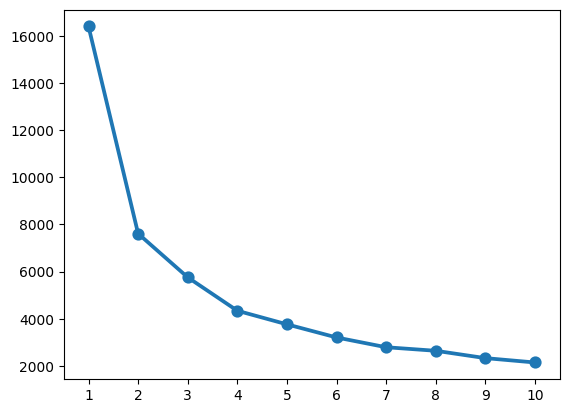

In [22]:
wcss={}
for k in range(1,11):
  kmeans=KMeans(n_clusters=k,max_iter=300,init='k-means++')
  kmeans.fit(X)
  wcss[k]=kmeans.inertia_

import seaborn as sns
sns.pointplot(x=list(wcss.keys()),y=list(wcss.values()))

In [23]:
from sklearn.cluster import DBSCAN
db=DBSCAN()
db.fit(X)

DBSCAN()

In [31]:
np.unique(db.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
       50, 51, 52, 53, 54, 55, 56, 57])

In [35]:
rfm['db']=db.labels_

In [36]:
rfm

,Recency,Frequency,Monetary,R,F,M,cluster,db
CustomerID,,,,,,,,
12346.0,326,2,0.00,1,1,1,1,0
12347.0,3,182,4310.00,4,4,4,2,1
12348.0,76,31,1797.24,2,2,4,0,2
12349.0,19,73,1757.55,3,3,4,2,3
12350.0,311,17,334.40,1,1,2,1,4
...,...,...,...,...,...,...,...,...
18280.0,278,10,180.60,1,1,1,1,0
18281.0,181,7,80.82,1,1,1,1,0
18282.0,8,13,176.60,4,1,1,4,13


In [24]:
from sklearn.metrics import silhouette_score
silhouette_score(X,db.labels_)

0.9966246613699487